In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt 
from scipy.spatial import Delaunay 
import skimage as sk
import scipy as sci
import cv2
import os 
from scipy.interpolate import interp2d


In [2]:
os.getcwd()

'c:\\Users\\Frank\\Desktop\\Courses\\CS180\\Morphing\\src'

In [16]:
#Triangle Vert is a 3x2 array
def imgToTriangle(triangleVert, img):
    triangleVert = np.array(triangleVert)
    mask = sk.draw.polygon2mask(img.shape[0:3], triangleVert)
    return img * mask

In [4]:
#Inverse transform from t1 to t2
def affineTrans(triIndex, t1Points, t1Simplicies, t2Points):
    t1 = [t1Points[i] for i in t1Simplicies[triIndex]]
    t2 = [t2Points[i] for i in t1Simplicies[triIndex]]
    # print(t1)
    # print(t2)
    t1Vec = np.array([t1[0] - t1[1],  t1[0] - t1[2]]).T
    t2Vec = np.array([t2[0] - t2[1],  t2[0] - t2[2]]).T
    # print(t1Vec)
    # print(t2Vec)
    t1VecToRight = np.eye(3)
    t1VecToRight[0:2, 0:2] = t1Vec
    t1VecToRight[0:2, 2] = t1[0]
    t1VecToRight = np.linalg.inv(t1VecToRight)

    rightToT2 = np.eye(3)
    rightToT2[0:2, 0:2] = t2Vec
    rightToT2[0:2, 2] = t2[0]

    return rightToT2 @ t1VecToRight
    

In [34]:
def warpImg(im1Points, im1Tri, im2Points, img):
    warpedIm2 = np.zeros_like(img).astype(np.float64)
    for i in range(0, len(im1Tri.simplices)):
        maskedIm2 = imgToTriangle([[im2Points[i][1],im2Points[i][0]] for i in im1Tri.simplices[i]], img)
        inverseMap = affineTrans(i, im1Points, im1Tri.simplices, im2Points)
        triangle = sk.transform.warp(maskedIm2, inverseMap)
        warpedIm2 += triangle
    return warpedIm2

In [31]:
def warpWithRatio(im1, im1Points, im2, im2Points, crossRatio, morphRatio):
    averagePoints = [np.average(a, weights=[morphRatio, 1-morphRatio], axis=0) for a in zip(im1Points, im2Points)]
    averagePoints = np.array(averagePoints) 
    triAverage = Delaunay(averagePoints)
    img1Warp = warpImg(averagePoints, triAverage, im1Points, im1)
    img2Warp = warpImg(averagePoints, triAverage, im2Points, im2)
    interpolatedImg = img1Warp * crossRatio + img2Warp * (1-crossRatio)
    interpolatedImg = np.clip(interpolatedImg, 0, 1)
    
    return interpolatedImg


In [46]:
im1 = plt.imread('../../Morphing/Photos/meRescaled.jpg')
im2 = plt.imread('../../Morphing/Photos/chadRescaled.jpg')

In [47]:
with open('../../Morphing/Photos/corrv2.json') as jsonFile:
    keyPoints = json.load(jsonFile)
keyPoints['im1Points'].extend([[0,im2.shape[0]], [im2.shape[1],im2.shape[0]], [0,0], [im2.shape[1],0]])
keyPoints['im1Points'].extend([[0,im2.shape[0]//2], [im2.shape[1],im2.shape[0]//2], [im2.shape[1]//2,im2.shape[0]], [im2.shape[1]//2,0]])
keyPoints['im2Points'].extend([[0,im2.shape[0]], [im2.shape[1],im2.shape[0]], [0,0], [im2.shape[1],0]])
keyPoints['im2Points'].extend([[0,im2.shape[0]//2], [im2.shape[1],im2.shape[0]//2], [im2.shape[1]//2,im2.shape[0]], [im2.shape[1]//2,0]])

In [48]:
im1Points = np.array(keyPoints['im1Points'])
im2Points = np.array(keyPoints['im2Points'])

In [49]:
for i in range(0, 31):
    print(f"loop {i}")
    test = warpWithRatio(im2, im2Points, im1, im1Points, 1/30 * i, 1/30 * i)
    # plt.imsave(f'../morphOut/test/output_{i}.png', test)

loop 0
loop 1
loop 2
loop 3
loop 4
loop 5
loop 6
loop 7
loop 8
loop 9
loop 10
loop 11
loop 12
loop 13
loop 14
loop 15
loop 16
loop 17
loop 18
loop 19
loop 20
loop 21
loop 22
loop 23
loop 24
loop 25
loop 26
loop 27
loop 28
loop 29
loop 30


In [28]:
np.max(test)

np.uint8(5)

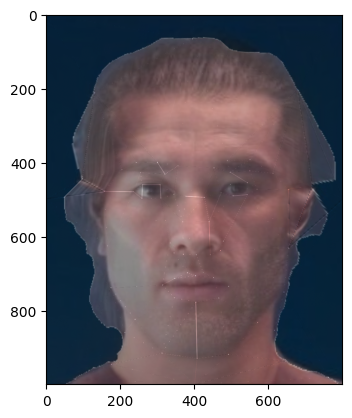

In [33]:
plt.imshow(test)

In [835]:
test1 = test.copy()
test1[test1 > 1] = 0

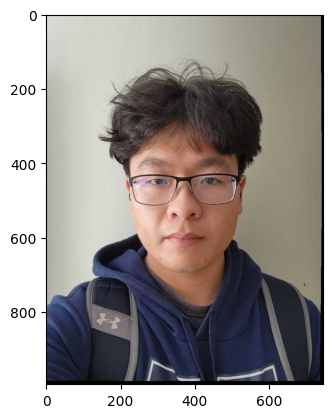

In [836]:
plt.imshow(test1)
plt.imsave('../testing/output.png', test1)

In [106]:
from scipy.interpolate import griddata

In [111]:
grid_x, grid_y = np.mgrid[0:test.shape[0], 0:test.shape[1]]
points = np.meshgrid(np.linspace(0, test.shape[0]), np.linspace(0, test.shape[1]))
print(test[:,:,0].shape)
print(len(points))
grid_z0 = griddata(points, test[:,:,0], (grid_x, grid_y), method='nearest')


(995, 746)
2


ValueError: different number of values and points